In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def show_image(image):
    plt.figure(figsize = (15,5))
    plt.imshow(image,aspect='auto')

In [44]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#adaptiveThresholding
def adadaptiveThresholding(image):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

#dilation
def dilate(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#cropping
##def cropping(image):
##    return image[200:510,200:2200]


#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

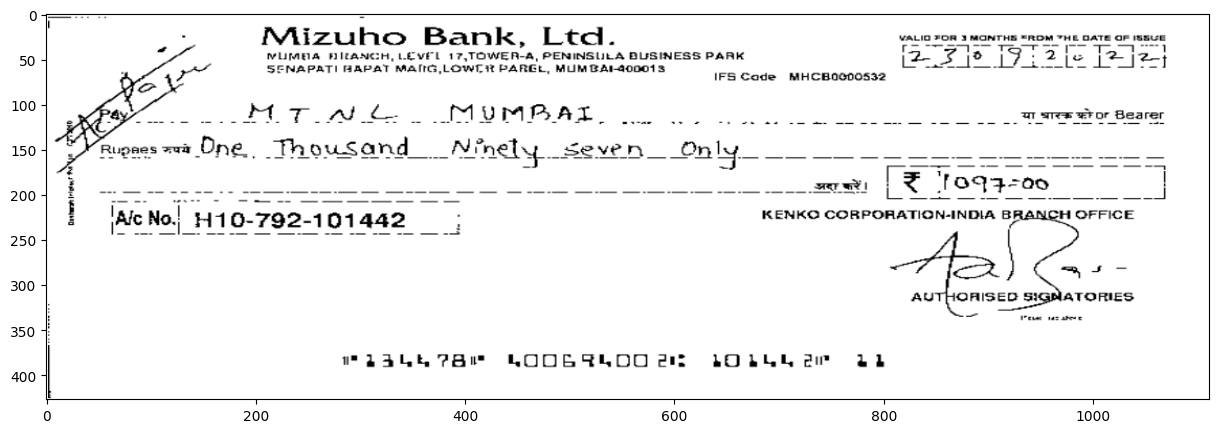

In [45]:
img = cv2.imread('input/cheque1.png')
show_image(img)

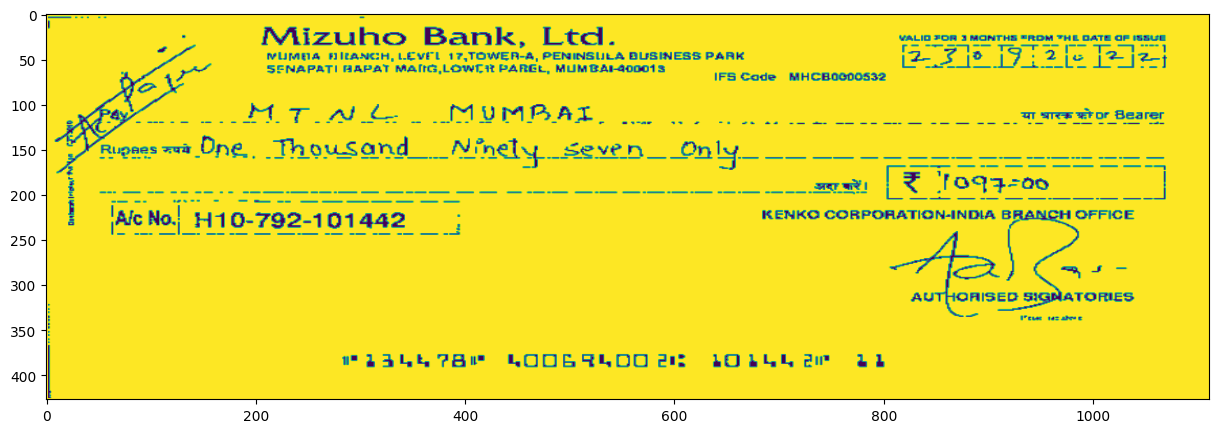

In [46]:
gray=get_grayscale(img)
show_image(gray)

In [47]:
#denoised=remove_noise(gray)
#plt.imshow(denoised)

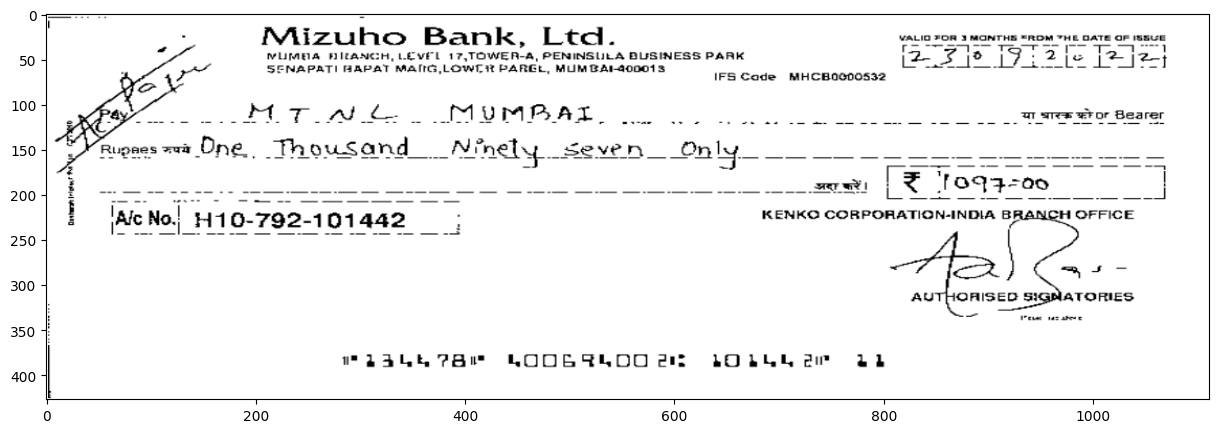

In [48]:
dilate_img = dilate(img)
show_image(dilate_img)

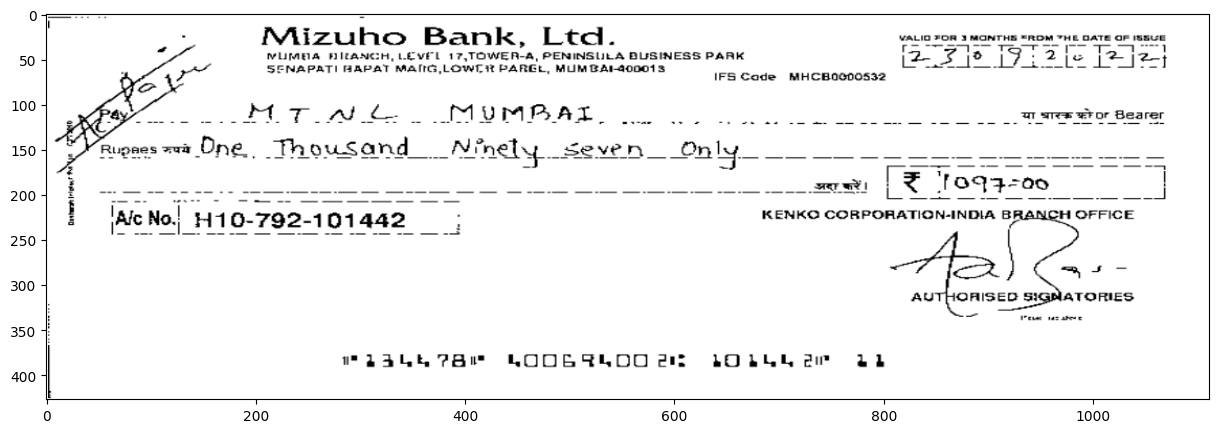

In [49]:
erode_img = dilate(dilate_img)
show_image(erode_img)

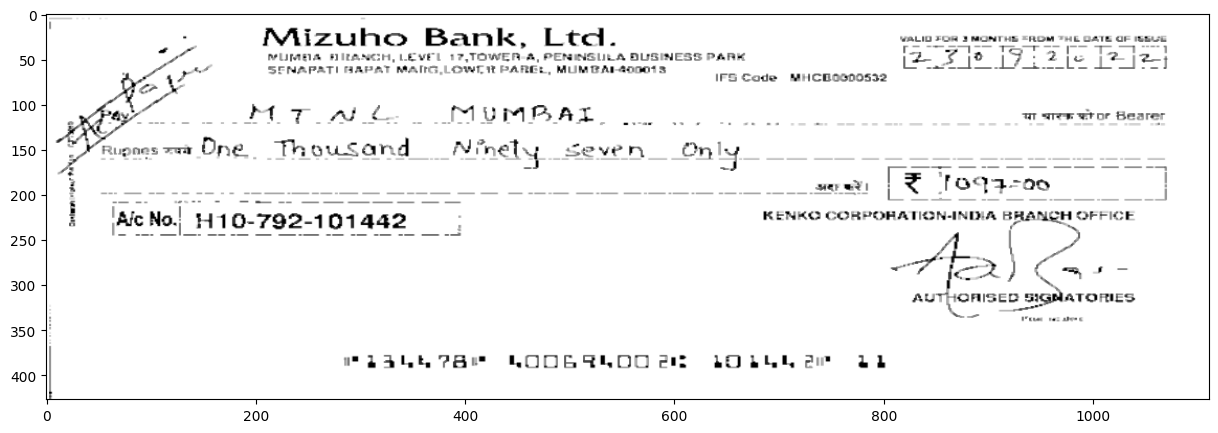

In [50]:
kernel = np.ones((2,2),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
show_image(closing)

In [64]:
img1 = cv2.imread('input/cheque1.png')
 
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img1, kernel, iterations=1)
img_dilation = cv2.dilate(img1, kernel, iterations=1)

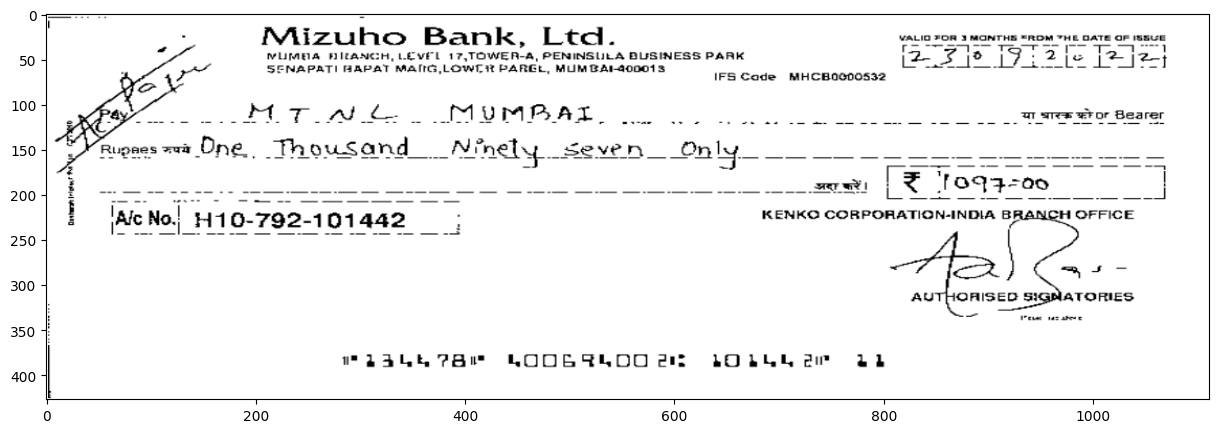

In [65]:
show_image(img)

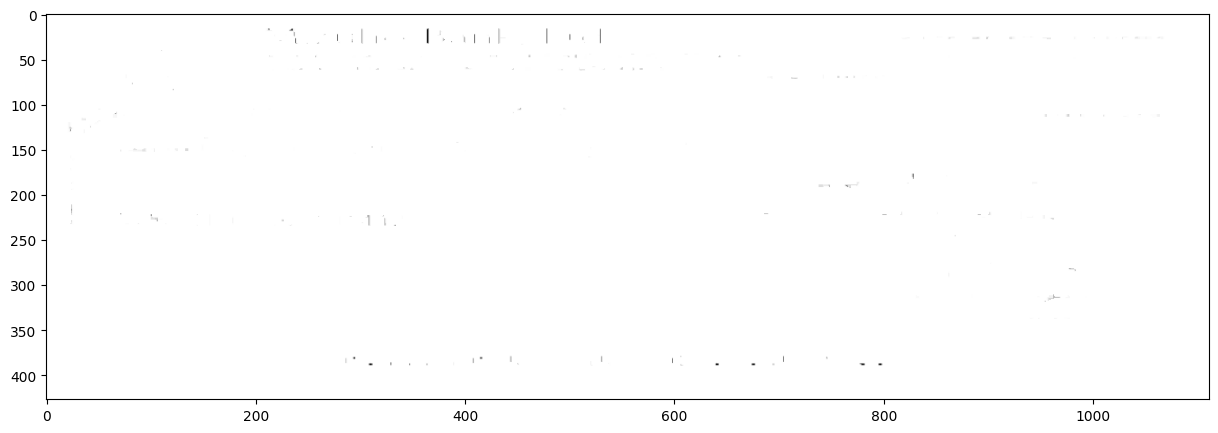

In [66]:
show_image(img_dilation)

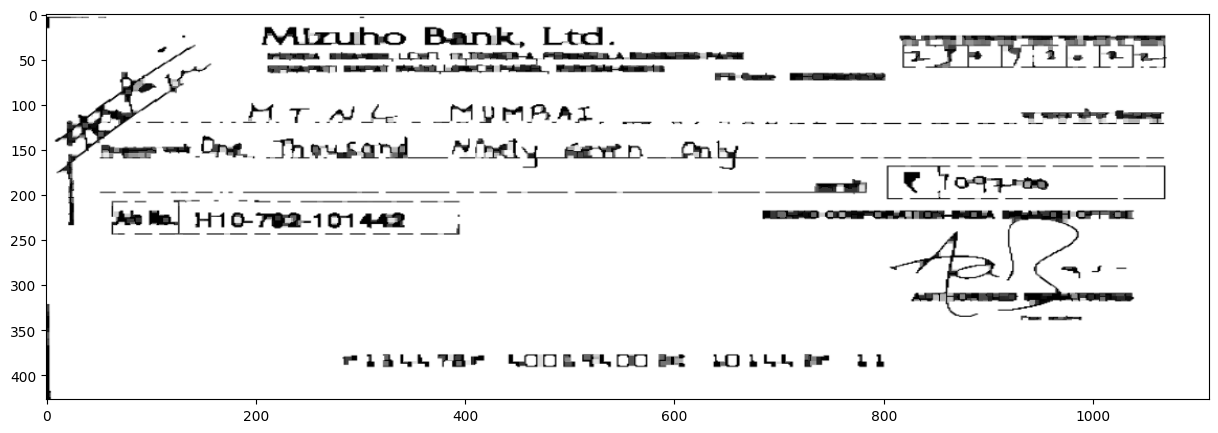

In [62]:
img_erosion1 = cv2.dilate(img_erosion, kernel, iterations=1)
show_image(img_erosion1)